# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

In [6]:
#The more height, he more volume but not so directly, maybe witha slope or around 30 degrees

**(b) Describe the relationship between volume and diameter of these trees.**

In [3]:
#they are also related but more clearly linearly, and with a skpoe of maybe around 45 degrees

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

In [5]:
#Using the Diameter, I would be more able to predict the volume, since the relationship between diameter and volume seems to be stronger that between height and volume

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [8]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

# Import data with pandas 
utils = pd.read_csv("data/utils.csv")
utils.head(n=2)

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

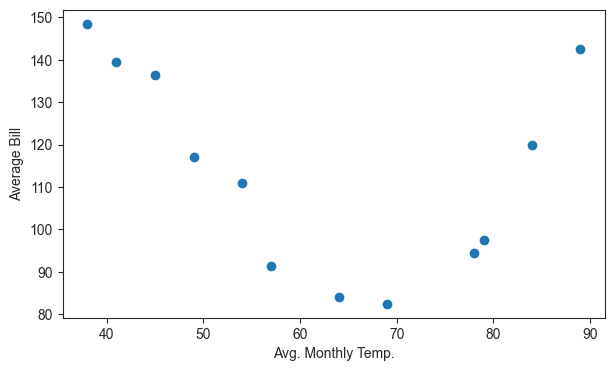

In [15]:
# Plot the variables of interest as scatter plot
plt.scatter(utils['Average Monthly Temperature'], utils['Average Bill'])#
plt.xlabel("Avg. Monthly Temp.")
plt.ylabel("Average Bill");
#plt.scatter(utils['Average Bill'], utils['Average Monthly Temperature'])#
#plt.xlabel("Avg. Bill")
#plt.ylabel("Avg. Monthly Temp");
# Predictive: Avg. Monthly Temp.
# Response : Avg. Bill

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

In [16]:
# The Monthly Bill is high in winter and goes down in Spring and goes up again in Summer

**(d) Train a simple linear regression model using scikit-learn**

In [20]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

# Prepare data for modeling by defining target and feature
X = utils[['Average Monthly Temperature']]  # X needs to be 2-dimensional so we need double brackets here
y = utils['Average Bill']

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, y)

LinearRegression()

**(e) Calculate and interpret the value of $R^2$.**  

In [22]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

# Calculate the estimated value for each data point
y_hat = lin_reg.predict(X)

# Calculate the R-squared for our model
print("R-squared:", r2_score(y, y_hat).round(3))

R-squared: 0.124


**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [23]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 143.62280506779285
Coefficient for feature weight: -0.4798844187597245


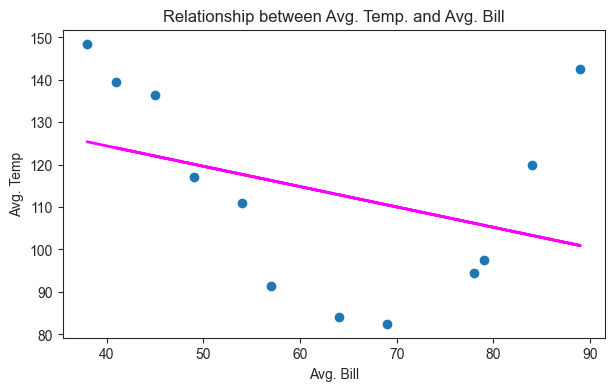

In [24]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between Avg. Temp. and Avg. Bill")
plt.ylabel("Avg. Temp");
plt.xlabel("Avg. Bill");

**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [26]:
# Predict the Bill value for a Temp of 120 degrees 
Bill_at_120 = pd.DataFrame({'Average Monthly Temperature': [120]})
y_hat_new = lin_reg.predict(Bill_at_120)
print("Predicted value for new observation:", y_hat_new[0].round(3))

Predicted value for new observation: 86.037
